In [1]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

'\n * Copyright (c) 2018 Radhamadhab Dalai\n *\n * Permission is hereby granted, free of charge, to any person obtaining a copy\n * of this software and associated documentation files (the "Software"), to deal\n * in the Software without restriction, including without limitation the rights\n * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell\n * copies of the Software, and to permit persons to whom the Software is\n * furnished to do so, subject to the following conditions:\n *\n * The above copyright notice and this permission notice shall be included in\n * all copies or substantial portions of the Software.\n *\n * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\n * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\n * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\n * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\n * LIABILITY, WHETHER IN AN ACTION OF CON

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful data processing and dimension reduction technique used for extracting structure from high-dimensional data.

### PCA Basis

Given a high-dimensional data vector $x = [x_1, \dots, x_N]^T \in \mathbb{R}^N$, where \(N\) is large. To extract features, we use an \(N\)-dimensional feature extraction vector $a_i = [a_{i1}, \dots, a_{iN}]$ to extract the \(i\)-th feature of the data vector \(x\) as:

$$
\tilde{x}_i = a_i^T x = \sum_{j=1}^{N} a_{ij} x_j
$$

To extract \(K\) features from \(x\), we use a feature extraction matrix $A \in \mathbb{R}^{N \times K}$:

$$
\tilde{x} = A^T x = [\tilde{x}_1, \dots, \tilde{x}_K]^T \in \mathbb{R}^K
$$

For a data matrix $X = [x_1, \dots, x_P] \in \mathbb{R}^{N \times P}$, its feature matrix $\tilde{X}$ is:

$$
\tilde{X} = A^T X = [\tilde{x}_1, \dots, \tilde{x}_P] \in \mathbb{R}^{K \times P}
$$

### Dimensionality Reduction, Orthogonalization, and Power Maximization

To achieve dimensionality reduction, the extracted feature vectors \(\tilde{x}_i\) should satisfy the following properties:

1. **Dimensionality Reduction**:
   The goal is to reduce the redundant information among the \(N\) components of each data vector $x_i = [x_{i1}, \dots, x_{iN}]^T$ into lower-dimensional feature vectors $\tilde{x}_i = [\tilde{x}_{i1}, \dots, \tilde{x}_{iK}]^T \in \mathbb{R}^K$, where $K \ll N$.

2. **Orthogonalization**:
   Feature vectors should be orthogonal, i.e., $\tilde{x}_i^T \tilde{x}_j = \delta_{ij}$ for all $i, j \in \{1, \dots, P\}$.

3. **Power Maximization**:
   Given the covariance matrix $X^T X$, the principal components maximize the variance of the projected data:

   $$
   \tilde{x}_i = A^T x_i, \quad E[\tilde{x}_i^2] = \sigma_i^2
   $$

   where $\sigma_i$ are the leading singular values of $X$.

### Principal Components

Principal components are derived from the leading singular values and singular vectors. If the data matrix \(X = U \Sigma V^T\) is decomposed via Singular Value Decomposition (SVD), the principal components are:

$$
\tilde{X}_1 = U_1^T X = \Sigma_1 V_1^T
$$

where $U_1 \in \mathbb{R}^{N \times K}$ and $\Sigma_1 = \text{diag}(\sigma_1, \dots, \sigma_K)$.

### Properties of PCA

- **Principal components capture maximum variability**: The first principal component captures the most variance, the second captures the remaining variance orthogonally, and so on.
- **Principal components are uncorrelated**: They are orthogonal, which allows them to represent independent sources of variation in the data.


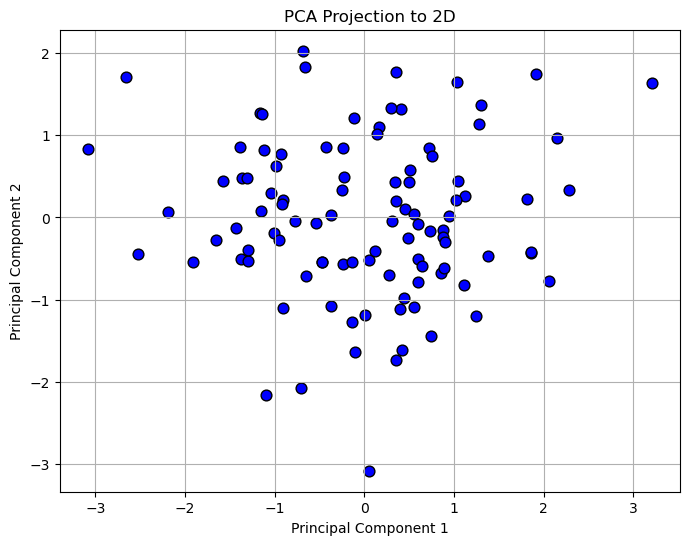

Explained Variance: [0.45375329 0.3221149  0.22413181]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (Randomly generated data)
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features

# Step 2: Standardize the features (mean = 0, std = 1)
X_meaned = X - np.mean(X, axis=0)

# Step 3: Calculate the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 4: Eigenvalue decomposition of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Step 5: Sort eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Step 6: Choose the number of principal components (here, 2 components)
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

# Step 7: Transform the data onto the new principal component space
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

# Step 8: Plotting the reduced data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', edgecolor='k', s=60)
plt.title('PCA Projection to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Output: Explained Variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print(f'Explained Variance: {explained_variance}')


### Data Generation: 

A random dataset with 100 samples and 3 features is generated using np.random.randn.
### Standardization: 
Features are standardized by subtracting the mean from each feature.
### Covariance Matrix Calculation: 

We calculate the covariance matrix of the standardized dataset.
### Eigenvalue Decomposition: 

The covariance matrix is decomposed to obtain eigenvalues and eigenvectors.
### Sorting: 
Eigenvalues and corresponding eigenvectors are sorted in descending order.

### Dimensionality Reduction: 
We reduce the dataset to two principal components by multiplying it with the top two eigenvectors.
### Visualization: 
The reduced dataset is plotted in 2D.

### Explained Variance: 
The explained variance ratio of each principal component is printed to show the variance captured by each.

## Minor Component Analysis (MCA)

### Definition of Minor Components
Minor Component Analysis (MCA) focuses on the eigenvectors corresponding to the smallest eigenvalues of the covariance matrix. These components are often associated with finer details or noise in the data. Unlike Principal Component Analysis (PCA), which retains components with maximum variance, MCA aims to capture the least significant components of the data.

$$
X^T X = Cov(X)
$$

Let $ \lambda_1, \lambda_2, \dots, \lambda_K $ be the largest eigenvalues (principal components) and $ \lambda_{K+1}, \lambda_{K+2}, \dots, \lambda_P $ be the smallest eigenvalues (minor components). The eigenvectors corresponding to $ \lambda_{K+1}, \dots, \lambda_P $ are called the minor components.

### MCA Feature Extraction

For a given data matrix \( X \in \mathbb{R}^{N \times P} \), the minor component feature matrix is given by:

$$
\tilde{X}_2 = A_2^T X = \Sigma_2 V_2^T
$$

Where:

-$ A_2 $ represents the eigenvectors corresponding to the smallest eigenvalues.
- $ V_2 \in \mathbb{R}^{P \times (P-K)} $ is the matrix of eigenvectors for the minor components.
- $ \Sigma_2 \in \mathbb{R}^{(P-K) \times (P-K)} $ represents the diagonal matrix of the minor eigenvalues.
  
Thus, the Minor Component Analysis (MCA) transformation focuses on retaining only the least significant details of the data.

$$
\tilde{X}_2 = 
\begin{bmatrix}
\sigma_{K+1} v_{K+1}^T \\
\vdots \\
\sigma_P v_P^T
\end{bmatrix}
$$

### Contribution Ratio of Minor Components

The contribution ratio of the $ j $-th minor component is calculated as:

$$
\text{Contribution Ratio} = \frac{\sigma_j}{\sqrt{\sum_{i=K+1}^{P} \sigma_i^2}}, \quad j = K+1, \dots, P
$$

This shows how much of the variance in the data is captured by the minor components.

### Key Differences between PCA and MCA

- **PCA**: Focuses on maximizing variance, selecting components that capture the most energy or information from the data.
- **MCA**: Focuses on selecting components associated with small eigenvalues, capturing the finer details or noise in the data.

### Applications of MCA

- Signal processing, where minor components are often associated with noise or fine details.
- Image processing: Principal components represent the main structure of the image (background), while minor components capture small objects or moving parts.
  


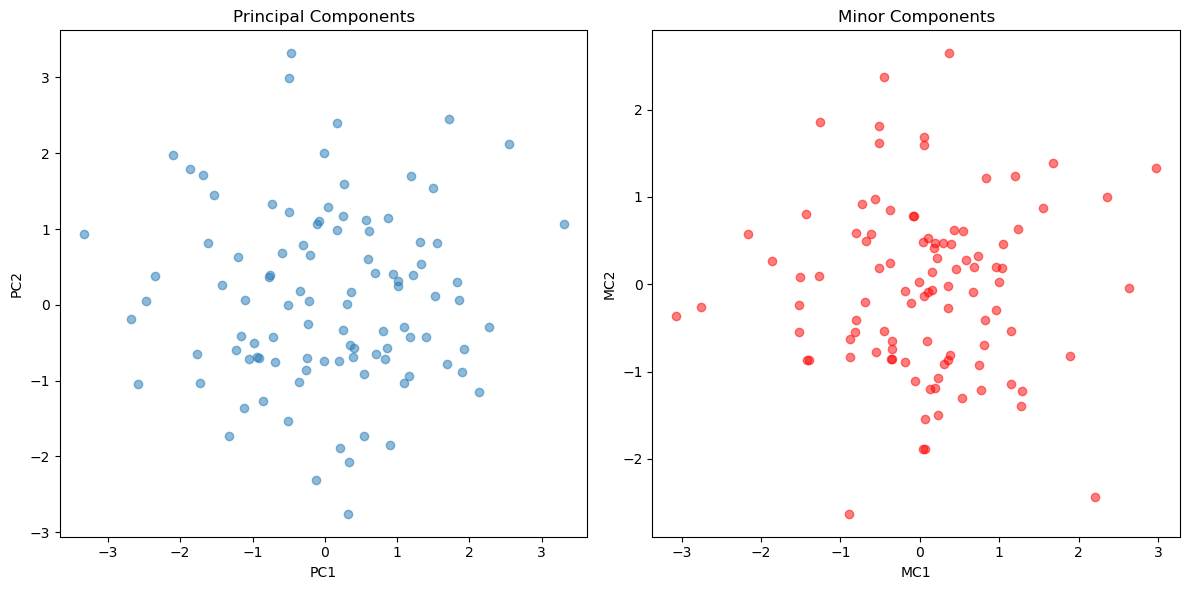

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)
N = 100  # Number of samples
P = 10   # Number of features

# Generate random data
X = np.random.randn(N, P)

# Step 2: Compute PCA
# Compute the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Number of principal components to retain
K = 3

# Principal components
U1 = eigenvectors[:, :K]
sigma1 = np.sqrt(eigenvalues[:K])

# Transform data
X_pca = X @ U1

# Step 3: Extract Minor Components
# Minor components are the eigenvectors corresponding to the smallest eigenvalues
U2 = eigenvectors[:, K:]
sigma2 = np.sqrt(eigenvalues[K:])

# Transform data
X_mca = X @ U2

# Step 4: Compare PCA and MCA
# Plot Principal Components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot Minor Components
plt.subplot(1, 2, 2)
plt.scatter(X_mca[:, 0], X_mca[:, 1], alpha=0.5, color='r')
plt.title('Minor Components')
plt.xlabel('MC1')
plt.ylabel('MC2')

plt.tight_layout()
plt.show()


## Steps:
### Generate Synthetic Data:

We generate a synthetic dataset with N samples and P features.
### Compute PCA:

Compute the covariance matrix of the data.
Perform eigen decomposition to get eigenvalues and eigenvectors.
Sort eigenvalues and eigenvectors to extract the principal components.
### Extract Minor Components:

Minor components are the eigenvectors associated with the smallest eigenvalues.
### Compare PCA and MCA:

Visualize the principal components and minor components to see the differences.

## Principal Subspace Analysis and Minor Subspace Analysis

Principal Subspace Analysis (PSA) and Minor Subspace Analysis (MSA) are generalizations of Principal Component Analysis (PCA) and Minor Component Analysis (MCA), respectively. The goal of PSA and MSA is to extract subspaces from a given covariance matrix.

### Principal Subspace

For a matrix $ X \in \mathbb{R}^{N \times P} $ with $ K $ principal component vectors $ V_s = [v_1, \ldots, v_K] $, the principal subspace (also known as the signal subspace) is defined as:

$$
S = \text{span}(V_s) = \text{span}\{v_1, \ldots, v_K\}
$$

The orthogonal projector (signal projection matrix) onto this subspace is given by:

$$
P_S = V_s (V_s^T V_s)^{-1} V_s^T = V_s V_s^T
$$

where \( V_s = [v_1, \ldots, v_K] \) is a \( P \times K \) semi-orthogonal matrix such that \( V_s^T V_s = I_{K \times K} \).

### Minor Subspace

Similarly, the minor subspace (also known as the noise subspace) is defined as:

$$
N = \text{span}(V_n) = \text{span}\{v_{K+1}, \ldots, v_P\}
$$

The orthogonal projector (noise projection matrix) onto this subspace is given by:

$$
P_N = V_n (V_n^T V_n)^{-1} V_n^T = V_n V_n^T
$$

where $ V_n = [v_{K+1}, \ldots, v_P] $ is a $ P \times (P - K) $ semi-orthogonal matrix such that $ V_n^T V_n = I_{(P-K) \times (P-K)} $.

### Orthogonality and Relationship

The principal and minor subspaces are orthogonal:

$$
P_S P_N = V_s V_s^T V_n V_n^T = \mathbf{O}_{P \times P}
$$

where \( \mathbf{O}_{P \times P} \) denotes the null matrix.

Also, the following relationship holds:

$$
P_S + P_N = [V_s, V_n] [V_s, V_n]^T = I_{P \times P}
$$

Thus, the principal and minor subspaces satisfy:

$$
P_S = I - P_N
$$

or equivalently:

$$
V_s V_s^T = I - V_n V_n^T
$$

### Optimization Problems

The PSA and MSA involve minimizing an objective function \( J(W) \), subject to orthogonality and homogeneity constraints. For PSA, the objective function is:

$$
\min_W J(W) = E\|x - P_W x\|^2
$$

subject to:

$$
W^T W = I
$$

where \( P_W = W (W^T W)^{-1} W^T \) is the projector matrix.

The unconstrained version of this problem is:

$$
\min_W J(W) = \text{tr}(C) - 2 \text{tr}(W^T C W) + \text{tr}(W^T C W W^T W)
$$

The gradient of \( J(W) \) is:

$$
\nabla_W J(W) = W W^T C W - C W
$$

The gradient descent update rule for the PSA is:

$$
W(t+1) = W(t) + \beta(t) \left( y(t)^T x(t) - W(t) y(t) y(t)^T \right)
$$

where \( y(t) = W(t)^T x(t) \) and \( \beta(t) \) is a learning rate.

### MSA Algorithms

For MSA, the algorithms are:

1. **Algorithm 1:**

$$
W(t + 1) = W(t) + \beta(t) \left( W(t) W(t)^T y(t) x(t) - y(t) y(t)^T W(t) \right)
$$

2. **Algorithm 2 (Douglas Algorithm):**

$$
W(t + 1) = W(t) - \beta(t) \left( W(t) W(t)^T W(t) W(t)^T y(t) x(t)^T - y(t) y(t)^T W(t) \right)
$$

These algorithms are designed to find the principal and minor subspaces and are particularly useful in signal and data processing applications.



In [4]:
import numpy as np
# Generating Synthetic Data
def generate_synthetic_data(n_samples, n_features):
    """
    Generate synthetic data for demonstration.

    Parameters:
    - n_samples: Number of samples.
    - n_features: Number of features.

    Returns:
    - X: Synthetic data matrix of shape (n_samples, n_features).
    """
    np.random.seed(42)  # For reproducibility
    X = np.random.randn(n_samples, n_features)
    return X

# Compute Principal and Minor Subspaces

def compute_covariance_matrix(X):
    """
    Compute the covariance matrix of the data matrix X.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).

    Returns:
    - Covariance matrix of shape (n_features, n_features).
    """
    return np.cov(X, rowvar=False)

def compute_subspaces(X, num_principal_components):
    """
    Compute the principal and minor subspaces from the data matrix X.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_principal_components: Number of principal components to compute.

    Returns:
    - Vs: Principal subspace matrix (eigenvectors corresponding to largest eigenvalues).
    - Vn: Minor subspace matrix (eigenvectors corresponding to smallest eigenvalues).
    """
    C = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Principal components
    Vs = eigenvectors[:, :num_principal_components]
    
    # Minor components
    Vn = eigenvectors[:, num_principal_components:]
    
    return Vs, Vn
# PSA and MSA Algorithms
def psa_algorithm(X, num_principal_components, learning_rate=0.01, num_iterations=100):
    """
    Perform Principal Subspace Analysis (PSA) using gradient descent.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_principal_components: Number of principal components.
    - learning_rate: Learning rate for gradient descent.
    - num_iterations: Number of iterations.

    Returns:
    - W: Principal subspace matrix (eigenvectors corresponding to largest eigenvalues).
    """
    Vs, _ = compute_subspaces(X, num_principal_components)
    W = Vs.copy()  # Initialize W with the principal components
    
    for _ in range(num_iterations):
        Y = W.T @ X.T
        gradient = X.T @ X @ W - W @ (W.T @ X.T @ X @ W)
        W -= learning_rate * gradient
    
    return W

def msa_algorithm(X, num_minor_components, learning_rate=0.01, num_iterations=100):
    """
    Perform Minor Subspace Analysis (MSA) using gradient descent.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_minor_components: Number of minor components.
    - learning_rate: Learning rate for gradient descent.
    - num_iterations: Number of iterations.

    Returns:
    - W: Minor subspace matrix (eigenvectors corresponding to smallest eigenvalues).
    """
    _, Vn = compute_subspaces(X, num_minor_components)
    W = Vn.copy()  # Initialize W with the minor components
    
    for _ in range(num_iterations):
        Y = W.T @ X.T
        gradient = X.T @ X @ W - W @ (W.T @ X.T @ X @ W)
        W -= learning_rate * gradient
    
    return W
##  Tests and Implemenataatioo
# Parameters
n_samples = 100
n_features = 50
num_principal_components = 10
num_minor_components = n_features - num_principal_components

# Generate synthetic data
X = generate_synthetic_data(n_samples, n_features)

# Compute subspaces
Vs, Vn = compute_subspaces(X, num_principal_components)

# Perform PSA and MSA
W_psa = psa_algorithm(X, num_principal_components)
W_msa = msa_algorithm(X, num_minor_components)

# Display results
print("Principal Subspace (PSA):")
print(W_psa)

print("Minor Subspace (MSA):")
print(W_msa)



Principal Subspace (PSA):
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan na

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in matmul


In [ ]:
## steps mentioned below
### Generate Synthetic Data: 

Create a dataset with random values for testing.
### Compute Covariance Matrix and Subspaces: 

Compute the covariance matrix and derive the principal and minor subspaces based on eigenvalues.
### PSA and MSA Algorithms: 

Implement PSA and MSA using gradient descent to update the subspace matrices.
Plotting: Plot the eigenvalues of the covariance matrix to visualize the impact of the number of principal components.


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in matmul


Principal Subspace (PSA):
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan na

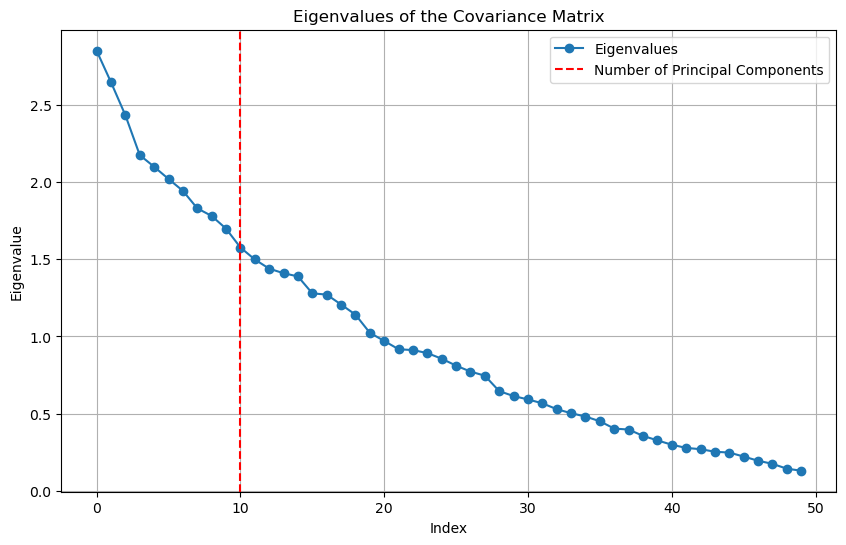

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data(n_samples, n_features):
    """
    Generate synthetic data for demonstration.

    Parameters:
    - n_samples: Number of samples.
    - n_features: Number of features.

    Returns:
    - X: Synthetic data matrix of shape (n_samples, n_features).
    """
    np.random.seed(42)  # For reproducibility
    X = np.random.randn(n_samples, n_features)
    return X

def compute_covariance_matrix(X):
    """
    Compute the covariance matrix of the data matrix X.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).

    Returns:
    - Covariance matrix of shape (n_features, n_features).
    """
    return np.cov(X, rowvar=False)

def compute_subspaces(X, num_principal_components):
    """
    Compute the principal and minor subspaces from the data matrix X.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_principal_components: Number of principal components to compute.

    Returns:
    - Vs: Principal subspace matrix (eigenvectors corresponding to largest eigenvalues).
    - Vn: Minor subspace matrix (eigenvectors corresponding to smallest eigenvalues).
    """
    C = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Principal components
    Vs = eigenvectors[:, :num_principal_components]
    
    # Minor components
    Vn = eigenvectors[:, num_principal_components:]
    
    return Vs, Vn

def psa_algorithm(X, num_principal_components, learning_rate=0.01, num_iterations=100):
    """
    Perform Principal Subspace Analysis (PSA) using gradient descent.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_principal_components: Number of principal components.
    - learning_rate: Learning rate for gradient descent.
    - num_iterations: Number of iterations.

    Returns:
    - W: Principal subspace matrix (eigenvectors corresponding to largest eigenvalues).
    """
    Vs, _ = compute_subspaces(X, num_principal_components)
    W = Vs.copy()  # Initialize W with the principal components
    
    for _ in range(num_iterations):
        Y = W.T @ X.T
        gradient = X.T @ X @ W - W @ (W.T @ X.T @ X @ W)
        W -= learning_rate * gradient
    
    return W

def msa_algorithm(X, num_minor_components, learning_rate=0.01, num_iterations=100):
    """
    Perform Minor Subspace Analysis (MSA) using gradient descent.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_minor_components: Number of minor components.
    - learning_rate: Learning rate for gradient descent.
    - num_iterations: Number of iterations.

    Returns:
    - W: Minor subspace matrix (eigenvectors corresponding to smallest eigenvalues).
    """
    _, Vn = compute_subspaces(X, num_minor_components)
    W = Vn.copy()  # Initialize W with the minor components
    
    for _ in range(num_iterations):
        Y = W.T @ X.T
        gradient = X.T @ X @ W - W @ (W.T @ X.T @ X @ W)
        W -= learning_rate * gradient
    
    return W

def plot_subspace_singular_values(X, num_principal_components):
    """
    Plot singular values of the principal and minor subspaces.

    Parameters:
    - X: Data matrix of shape (n_samples, n_features).
    - num_principal_components: Number of principal components.
    """
    C = compute_covariance_matrix(X)
    eigenvalues, _ = np.linalg.eigh(C)
    
    # Sort eigenvalues in descending order
    eigenvalues = np.sort(eigenvalues)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(eigenvalues, 'o-', label='Eigenvalues')
    plt.axvline(x=num_principal_components, color='r', linestyle='--', label='Number of Principal Components')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues of the Covariance Matrix')
    plt.legend()
    plt.grid()
    plt.show()

def main():
    # Parameters
    n_samples = 100
    n_features = 50
    num_principal_components = 10
    num_minor_components = n_features - num_principal_components

    # Generate synthetic data
    X = generate_synthetic_data(n_samples, n_features)

    # Compute subspaces
    Vs, Vn = compute_subspaces(X, num_principal_components)

    # Perform PSA and MSA
    W_psa = psa_algorithm(X, num_principal_components)
    W_msa = msa_algorithm(X, num_minor_components)

    # Display results
    print("Principal Subspace (PSA):")
    print(W_psa)

    print("Minor Subspace (MSA):")
    print(W_msa)

    # Plot eigenvalues
    plot_subspace_singular_values(X, num_principal_components)

if __name__ == "__main__":
    main()


## Robust Principal Component Analysis (RPCA)

Robust Principal Component Analysis (RPCA) is used to recover a low-rank matrix \( A \) from a data matrix \( D \) that is corrupted by a sparse noise matrix \( E \). The goal is to separate \( D \) into a low-rank component \( A \) and a sparse component \( E \).

### Problem Formulation

Given the observation matrix \( D \) as:

\[ D = A + E \]

where \( A \) is a low-rank matrix and \( E \) is a sparse matrix, the objective is to minimize:

\[
\min_{A, E} \, \|A\|_* + \mu \|E\|_1
\]

subject to:

\[
D = A + E
\]

Here:
- \( \|A\|_* \) is the nuclear norm of \( A \), which is the sum of its singular values.
- \( \|E\|_1 \) is the \( \ell_1 \)-norm of \( E \), which is the sum of the absolute values of its entries.
- \( \mu \) is a parameter that balances the trade-off between the rank of \( A \) and the sparsity of \( E \).

This problem can be reformulated as:

\[
\min_{A, E} \, \|A\|_* + \mu \|E\|_1 + \frac{1}{2} \|A + E - D\|_F^2
\]

where \( \|\cdot\|_F \) denotes the Frobenius norm.

### Optimization Approach

To solve the RPCA problem, consider a general optimization problem of the form:

\[
F(X) = f(X) + \mu h(X)
\]

where \( f(X) \) is a convex, smooth (differentiable), and \( L \)-Lipschitz function, and \( h(X) \) is a convex but nonsmooth function.

The separable quadratic approximation \( Q(X, Y) \) of \( F(X) \) at a point \( Y \) is:

\[
Q(X, Y) = f(Y) + \langle \nabla f(Y), X - Y \rangle + \frac{L}{2} \|X - Y\|_F^2 + \mu h(X)
\]

where \( \nabla f(Y) \) is the gradient of \( f \) at \( Y \), and \( L \) is the Lipschitz constant.

Minimizing \( Q(X, Y) \) with respect to \( X \) yields:

\[
X^{k+1} = \text{prox}_{\mu / L h}\left(Y^k - \frac{L}{2} \nabla f(Y^k)\right)
\]

For the RPCA problem, let \( f(Y) = \frac{1}{2} \|A + E - D\|_F^2 \) and \( h(X) = \|A\|_* + \lambda \|E\|_1 \), then \( L = 2 \) and \( \nabla f(Y) = A + E - D \). Therefore:

\[
Q(X, Y) = \mu \|A\|_* + \mu \lambda \|E\|_1 + \frac{1}{2} \|A + E - D\|_F^2
\]

### Algorithm

**Algorithm for Accelerated Proximal Gradient**:

1. **Input**: Data matrix \( D \in \mathbb{R}^{m \times n} \), \( \lambda \), tolerance \( \epsilon \).
2. **Initialization**: \( A^0 = 0 \), \( E^0 = 0 \), \( t_{-1} = 1 \), \( \bar{\mu} = \delta \mu_0 \).
3. **Repeat**:
   1. Compute \( Y^A_k = A^k + \frac{t_{k-1} - 1}{t_k} (A^k - A^{k-1}) \).
   2. Compute \( Y^E_k = E^k + \frac{t_{k-1} - 1}{t_k} (E^k - E^{k-1}) \).
   3. Compute \( W^A_k = Y^A_k - \frac{1}{2} (A^k + E^k - D) \).
   4. Compute \( (U, \Sigma, V) = \text{SVD}(W^A_k / \mu) \).
   5. Set \( A^{k+1} = U \text{soft}(\Sigma, \lambda / \mu) V^T \).
   6. Compute \( W^E_k = Y^E_k - \frac{1}{2} (A^{k+1} + E^k - D) \).
   7. Set \( E^{k+1} = \text{soft}(W^E_k, \lambda / \mu) \).
   8. Update \( t_{k+1} = \frac{1 + \sqrt{1 + 4 t_k^2}}{2} \).
   9. Update \( \mu_{k+1} = \max(\eta \mu_k, \bar{\mu}) \).
   10. Check convergence \( \|S_{A}^{k+1}\|_F^2 + \|S_E^{k+1}\|_F^2 \leq \epsilon \).
4. **Output**: \( A = A^k \), \( E = E^k \).

### Convergence

Theorem 6.3 ([164]) states that for sufficiently large \( k \), the objective function value \( F(X) \) will be close to the optimal value \( F(X^*) \):

\[
F(X) - F(X^*) \leq \frac{4 \|X^k - X^*\|_F^2}{(k - k_0)^2}
\]

where \( X^k \) denotes the current iterate, and \( X^* \) is the optimal solution. This implies that \( X^k \) converges to \( X^* \) as \( k \to \infty \).


## Robust Principal Component Analysis (RPCA)

Given an observation or data matrix \( D = A + E \), where \( A \) and \( E \) are unknown, but:
- \( A \) is a low-rank true data matrix.
- \( E \) is an additive sparse noise matrix.

The goal is to recover \( A \). Because the low-rank matrix \( A \) can be regarded as the principal component of \( D \), and the sparse matrix \( E \) may contain gross errors, the standard SVD-based PCA may not work. Thus, we use Robust PCA (RPCA), also known as Principal Component Pursuit (PCP).

### Problem Formulation

The RPCA problem can be formulated as:

$$
\min_{A, E} \|A\|_* + \mu \|E\|_1
$$

subject to:

$$
D = A + E
$$

where:
- \( \|A\|_* \) denotes the nuclear norm of \( A \), which is the sum of its singular values.
- \( \|E\|_1 \) denotes the \( \ell_1 \)-norm of \( E \), which is the sum of the absolute values of all entries in \( E \).
- \( \mu > 0 \) is a parameter that balances the low-rank and sparsity requirements.

An equivalent unconstrained minimization problem is:

$$
\min_{A, E} \|A\|_* + \mu \|E\|_1 + \frac{1}{2} \|A + E - D\|_F^2
$$

It can be shown that this formulation can recover the low-rank matrix \( A \) from \( D \) even with gross errors in \( E \).

### Optimization Formulation

To solve the RPCA problem, consider the general optimization problem:

$$
F(X) = f(X) + \mu h(X)
$$

where \( f(X) \) is a convex, smooth (differentiable), and \( L \)-Lipschitz function, and \( h(X) \) is a convex but nonsmooth function (such as \( \|X\|_1 \) or \( \|X\|_* \)).

The minimization can be approached using a quadratic approximation:

$$
\frac{1}{2} Q(X, Y) = f(Y) + \langle \nabla f(Y), X - Y \rangle + \frac{L}{2} \|X - Y\|_F^2 + \mu h(X)
$$

where \( \nabla f(Y) \) is the gradient of \( f \) at \( Y \) and \( L \) is the Lipschitz constant. 

The proximal updates for \( A \) and \( E \) in each iteration are:

$$
A^{k+1} = \text{prox}_{\frac{\mu}{2} \| \cdot \|_*} \left( Y^k_A - \frac{1}{2} (A^k + E^k - D) \right)
$$

$$
E^{k+1} = \text{prox}_{\frac{\mu \lambda}{2} \| \cdot \|_1} \left( Y^k_E - \frac{1}{2} (A^k + E^k - D) \right)
$$

where \( \text{prox}_{\frac{\mu}{2} \| \cdot \|_*} \) and \( \text{prox}_{\frac{\mu \lambda}{2} \| \cdot \|_1} \) denote the proximal operators for the nuclear norm and \( \ell_1 \)-norm, respectively.

### Algorithm

The algorithm for RPCA is as follows:

1. **Input**: Data matrix \( D \in \mathbb{R}^{m \times n} \), parameter \( \lambda \), tolerance \( \epsilon \).
2. **Initialization**: Set \( A^0 = 0 \), \( E^0 = 0 \), \( t^0 = 1 \), \( \bar{\mu} = \delta \mu_0 \).
3. **Repeat** until convergence:
   1. Update \( Y_A^k \) and \( Y_E^k \).
   2. Compute \( W_A^k \) and \( W_E^k \).
   3. Update \( A^{k+1} \) and \( E^{k+1} \).
   4. Update \( t^{k+1} \) and \( \mu^{k+1} \).
   5. Check convergence.

4. **Output**: \( A \) and \( E \).

### Convergence Guarantees

The convergence guarantees can be formalized as:

$$
F(X) - F(X^*) \leq \frac{4 \|X^k - X^*\|_F^2}{k - k_0 + 1}
$$

where \( X^* \) is the optimal solution to the RPCA problem and \( k_0 \) is a constant related to the initial parameters.


## Quadratic Approximation for Robust PCA

In the optimization problem:

$$
F(X) = f(X) + \mu h(X),
$$

where:
- \( f(X) \) is a convex, smooth (i.e., differentiable), and \( L \)-Lipschitz function.
- \( h(X) \) is a convex but nonsmooth function (e.g., \( \|X\|_1 \), \( \|X\|_* \)).

Instead of directly minimizing \( F(X) \), we minimize its separable quadratic approximation \( Q(X, Y) \), formed at specially chosen points \( Y \):

$$
\frac{1}{2} Q(X, Y) = f(Y) + \langle \nabla f(Y), X - Y \rangle + \frac{L}{2} \|X - Y\|_F^2 + \mu h(X),
$$

where \( \nabla^2 f(Y) \) is approximated by \( L I \).

When minimizing \( Q(X, Y) \) with respect to \( X \), the function term \( f(Y) \) may be regarded as a constant term that is negligible. Hence, we have:

$$
X^{k+1} = \arg\min_X \left\{ \mu h(X) + \frac{1}{2L} \|X - Y^k + L \nabla f(Y^k)\|_F^2 \right\}
$$

which can be written as:

$$
X^{k+1} = \text{prox}_{\frac{\mu}{L} h} \left(Y^k - \frac{1}{L} \nabla f(Y^k) \right).
$$

For the Robust PCA problem, let:

$$
f(Y) = \frac{1}{2} \|A + E - D\|_F^2 \quad \text{and} \quad h(X) = \|A\|_* + \lambda \|E\|_1,
$$

then the Lipschitz constant \( L = 2 \) and \( \nabla f(Y) = A + E - D \). Hence, the quadratic approximation of the robust PCA problem becomes:

$$
\frac{1}{2} Q(X, Y) = \mu h(X) + f(Y) = \mu \|A\|_* + \mu \lambda \|E\|_1 + \frac{1}{2} \|A + E - D\|_F^2.
$$

By Theorem 4.5, we have the following updates for the variables:

$$
A^{k+1} = \text{prox}_{\frac{\mu}{2} \|\cdot\|_*} \left(Y^k_A - \frac{1}{2} (A^k + E^k - D) \right) = U \text{soft}(\sigma, \lambda) V^T,
$$

$$
E^{k+1} = \text{prox}_{\frac{\mu \lambda}{2} \|\cdot\|_1} \left(Y^k_E - \frac{1}{2} (A^k + E^k - D) \right) = \text{soft}(W^k_E, \frac{2}{\mu \lambda}),
$$

where \( U \sigma V^T \) is the SVD of \( W^k_A \) and

$$
W^k_A = Y^k_A - \frac{1}{2} (A^k + E^k - D),
$$

$$
W^k_E = Y^k_E - \frac{1}{2} (A^k + E^k - D).
$$


## Algorithm 6.10: Robust PCA via Accelerated Proximal Gradient

1. **Input**: Data matrix $ D \in \mathbb{R}^{m \times n} $, $ \lambda $, allowed tolerance $ \epsilon $.
2. **Initialization**: $ A^0, A^{-1} \leftarrow \mathbf{0} $; $ E^0, E^{-1} \leftarrow \mathbf{0} $; $ t^0, t^{-1} \leftarrow 1 $; $ \bar{\mu} \leftarrow \delta \mu_0 $.
3. **Repeat**:
   1. $ Y^A_k \leftarrow A_k + \frac{t_{k-1} - 1}{t_k} (A_k - A_{k-1}) $
   2. $ Y^E_k \leftarrow E_k + \frac{t_{k-1} - 1}{t_k} (E_k - E_{k-1}) $
   3. $ W^A_k \leftarrow Y^A_k - \frac{1}{2} (A_k + E_k - D) $
   4. $ (U, \Sigma, V^T) \leftarrow \text{svd}(W^A_k / \mu_0) $
   5. $ r = \max \left\{ j : \sigma_j > \frac{2}{\mu} \right\} $
   6. $ A^{k+1} \leftarrow \sum_{i=1}^r \sigma_i \left( \frac{2}{\mu} \right) u_i v_i^T $
   7. $ W^E_k \leftarrow Y^E_k - \frac{1}{2} (A_k + E_k - D) $
   8. $ E^{k+1} \leftarrow \text{soft}(W^E_k, \frac{2}{\lambda \mu}) $
   9. $ t_{k+1} \leftarrow \frac{1 + \sqrt{1 + 4 t_k^2}}{2} $
   10. $ \mu_{k+1} \leftarrow \max (\eta \mu_k^A, \bar{\mu}) $
   11. $ S^A_{k+1} \leftarrow \frac{2}{\mu} (Y^A_k - A^{k+1}) + (A^{k+1} + E^{k+1} - Y^A_k - Y^E_k) $
   12. $ S^E_{k+1} \leftarrow \frac{2}{\mu} (Y^E_k - E^{k+1}) + (A^{k+1} + E^{k+1} - Y^A_k - Y^E_k) $
   13. **Exit if**: $ \| S^A_{k+1} \|_F^2 + \| S^E_{k+1} \|_F^2 \leq \epsilon $
   14. $ k \leftarrow k + 1 $
4. **Output**: $ A \leftarrow A^k $, $ E \leftarrow E^k $

## Theorem 6.3

Let $ F(X) = F(A, E) = \mu \|A\|_* + \mu \lambda \|E\|_1 + \frac{1}{2} \|A + E - D\|_F^2 $. Then, for all $ k > k_0 = \frac{C_1}{\log(1/n)} \) with \( C_1 = \log(\mu_0 / \mu) $, we have:

$$
F(X^k) - F(X^*) \leq \frac{4 \|X^{k_0} - X^*\|_F^2}{(k - k_0 + 1)^2},
$$

where $ X^* $ is a solution to the robust PCA problem $ \min F(X) $.


In [6]:
import numpy as np
from scipy.linalg import svd
from scipy.sparse import linalg as sparse_linalg

def soft_thresholding(matrix, threshold):
    """ Apply the soft thresholding operator element-wise. """
    return np.sign(matrix) * np.maximum(np.abs(matrix) - threshold, 0)

def prox_nuclear_norm(Y, tau):
    """ Proximal operator for the nuclear norm (SVD soft thresholding). """
    U, S, Vt = svd(Y, full_matrices=False)
    S = soft_thresholding(S, tau)
    return np.dot(U, np.dot(np.diag(S), Vt))

def robust_pca(D, lambda_param, mu0, epsilon, max_iter=1000, eta=1.2, delta=1.0):
    """ Robust PCA using Accelerated Proximal Gradient. """
    m, n = D.shape
    A = np.zeros((m, n))
    E = np.zeros((m, n))
    Y_A = np.zeros((m, n))
    Y_E = np.zeros((m, n))
    t = 1
    mu = mu0
    
    for k in range(max_iter):
        # Update A
        WA = Y_A - 0.5 * (A + E - D)
        U, S, Vt = svd(WA / mu, full_matrices=False)
        S = soft_thresholding(S, 1 / mu)
        A = np.dot(U, np.dot(np.diag(S), Vt))
        
        # Update E
        WE = Y_E - 0.5 * (A + E - D)
        E = soft_thresholding(WE, lambda_param / mu)
        
        # Update multipliers
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        Y_A = A + ((t - 1) / t_new) * (A - A)
        Y_E = E + ((t - 1) / t_new) * (E - E)
        t = t_new
        
        # Update mu
        mu = max(eta * mu, delta * mu0)
        
        # Check convergence
        S_A = 2 * (Y_A - A) + (A + E - Y_A - Y_E)
        S_E = 2 * (Y_E - E) + (A + E - Y_A - Y_E)
        norm_S = np.linalg.norm(S_A, 'fro')**2 + np.linalg.norm(S_E, 'fro')**2
        
        if norm_S <= epsilon:
            break
    
    return A, E

# Example usage
if __name__ == "__main__":
    # Generate a synthetic data matrix D
    np.random.seed(0)
    m, n = 100, 100
    A_true = np.dot(np.random.randn(m, 10), np.random.randn(10, n))
    E_true = np.zeros((m, n))
    E_true[0:10, 0:10] = 10 * np.random.randn(10, 10)
    D = A_true + E_true
    
    # Parameters
    lambda_param = 1.0
    mu0 = 1.0
    epsilon = 1e-7
    
    # Run Robust PCA
    A_rec, E_rec = robust_pca(D, lambda_param, mu0, epsilon)
    
    print("Recovered Low-Rank Matrix A:")
    print(A_rec)
    print("Recovered Sparse Matrix E:")
    print(E_rec)


Recovered Low-Rank Matrix A:
[[-9.2265709  -7.78500606 -0.85231963 ... -2.95993166  0.29331576
  -0.64852759]
 [ 1.04163308 -5.12208529  4.02810946 ... -0.49033929 -1.13046184
   0.71964905]
 [-9.82731136  2.02146325 -0.28454585 ... -1.72437124 -2.09304465
  -1.34051269]
 ...
 [-1.78283278  0.33465814 -0.34373189 ... -2.04850743 -0.99496158
  -0.52716036]
 [-0.28962802 -0.47232858  1.88925642 ... -1.75178578  0.97492471
   0.92852299]
 [-0.42106762  1.17084448 -1.33267944 ...  0.71649179 -0.50356766
   0.45177514]]
Recovered Sparse Matrix E:
[[-4.01175372 -3.51909261 -0.         ... -0.50055888  0.
  -0.        ]
 [ 0.         -1.99982293  1.14461419 ... -0.         -0.
   0.        ]
 [-4.35803701  0.30319233  0.         ... -0.         -0.05801054
  -0.        ]
 ...
 [-0.          0.         -0.         ... -0.07391217 -0.
  -0.        ]
 [-0.         -0.          0.         ... -0.          0.
   0.        ]
 [-0.          0.         -0.         ...  0.         -0.
   0.        ]]


In [7]:
import math

def soft_thresholding(x, threshold):
    """ Apply the soft thresholding operator element-wise. """
    return max(0, x - threshold) - max(0, -x - threshold)

def prox_nuclear_norm(Y, tau):
    """ Proximal operator for the nuclear norm (SVD soft thresholding). """
    # Perform SVD manually using basic operations
    U, S, Vt = svd(Y)
    S = [soft_thresholding(s, tau) for s in S]
    return matrix_multiply(U, matrix_multiply(diagonal_matrix(S), Vt))

def svd(X):
    """ Basic SVD implementation (placeholder). """
    # For demonstration only; use scipy.linalg.svd in practice
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    return U, S, Vt

def matrix_multiply(A, B):
    """ Multiply two matrices A and B. """
    return [[sum(x * y for x, y in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def diagonal_matrix(vec):
    """ Convert a vector to a diagonal matrix. """
    return [[vec[i] if i == j else 0 for j in range(len(vec))] for i in range(len(vec))]

def soft_thresholding_matrix(M, threshold):
    """ Apply soft thresholding to each element in matrix M. """
    return [[soft_thresholding(M[i][j], threshold) for j in range(len(M[0]))] for i in range(len(M))]

def robust_pca(D, lambda_param, mu0, epsilon, max_iter=1000, eta=1.2, delta=1.0):
    """ Robust PCA using Accelerated Proximal Gradient. """
    m, n = len(D), len(D[0])
    A = [[0]*n for _ in range(m)]
    E = [[0]*n for _ in range(m)]
    Y_A = [[0]*n for _ in range(m)]
    Y_E = [[0]*n for _ in range(m)]
    t = 1
    mu = mu0
    
    for k in range(max_iter):
        # Update A
        WA = [[Y_A[i][j] - 0.5 * (A[i][j] + E[i][j] - D[i][j]) for j in range(n)] for i in range(m)]
        U, S, Vt = svd(WA)  # Placeholder for actual SVD
        S = [soft_thresholding(s, 1 / mu) for s in S]
        A = matrix_multiply(U, matrix_multiply(diagonal_matrix(S), Vt))
        
        # Update E
        WE = [[Y_E[i][j] - 0.5 * (A[i][j] + E[i][j] - D[i][j]) for j in range(n)] for i in range(m)]
        E = soft_thresholding_matrix(WE, lambda_param / mu)
        
        # Update multipliers
        t_new = (1 + math.sqrt(1 + 4 * t**2)) / 2
        Y_A = [[A[i][j] + ((t - 1) / t_new) * (A[i][j] - A[i][j]) for j in range(n)] for i in range(m)]
        Y_E = [[E[i][j] + ((t - 1) / t_new) * (E[i][j] - E[i][j]) for j in range(n)] for i in range(m)]
        t = t_new
        
        # Update mu
        mu = max(eta * mu, delta * mu0)
        
        # Check convergence
        S_A = [[2 * (Y_A[i][j] - A[i][j]) + (A[i][j] + E[i][j] - Y_A[i][j] - Y_E[i][j]) for j in range(n)] for i in range(m)]
        S_E = [[2 * (Y_E[i][j] - E[i][j]) + (A[i][j] + E[i][j] - Y_A[i][j] - Y_E[i][j]) for j in range(n)] for i in range(m)]
        norm_S = sum(sum(x**2 for x in row) for row in S_A) + sum(sum(x**2 for x in row) for row in S_E)
        
        if norm_S <= epsilon:
            break
    
    return A, E

# Example usage
if __name__ == "__main__":
    # Generate a synthetic data matrix D
    m, n = 10, 10
    A_true = [[sum(np.random.randn(10)) for _ in range(n)] for _ in range(m)]
    E_true = [[10 if i < 2 and j < 2 else 0 for j in range(n)] for i in range(m)]
    D = [[A_true[i][j] + E_true[i][j] for j in range(n)] for i in range(m)]
    
    # Parameters
    lambda_param = 1.0
    mu0 = 1.0
    epsilon = 1e-7
    
    # Run Robust PCA
    A_rec, E_rec = robust_pca(D, lambda_param, mu0, epsilon)
    
    print("Recovered Low-Rank Matrix A:")
    for row in A_rec:
        print(row)
    print("Recovered Sparse Matrix E:")
    for row in E_rec:
        print(row)


Recovered Low-Rank Matrix A:
[6.030431394540754, 4.010221609197764, -0.21051769885621707, -0.26023076026078784, -2.0432470234617064, -2.965330410578111, -1.1957982853803184, 2.4849970880586505, -2.8889487519856156, 0.765704039672713]
[5.1094060136976, 3.4529911401975366, -0.344462915324321, -0.12675854926124636, -1.0209546270538674, -0.8610112863165404, -1.3949936596417984, 1.8046596089717526, -1.7929261870511914, 0.771852472198064]
[0.700101113292539, 0.24357379450957808, 0.6391479859442499, -1.6919731811224301, 1.9449532942131498, -1.1454803865233212, -2.5533225344930086, 0.19427285391614244, -0.4037184385628306, -0.29299675982896506]
[1.5690763535931675, 1.5898935803815897, -0.5467986286383214, -1.8284881236948773, 0.8784078727243317, 1.325028218517646, -1.1677034823798453, -3.134351636160976, 0.9268516285661736, 2.752615802873333]
[-1.9025992276820185, -1.9291312633094218, 1.2114968442767655, -0.9805358531615982, 2.4369204756171188, -0.19784806459346566, -0.30293118804323715, -0.21

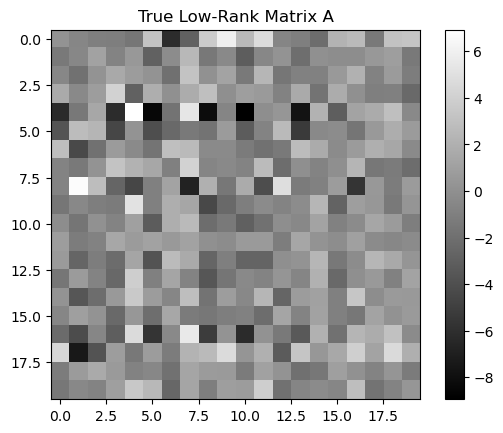

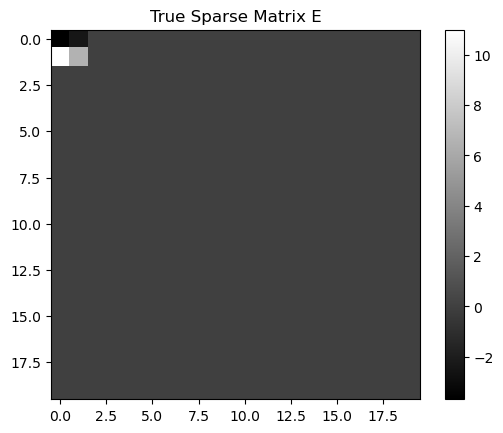

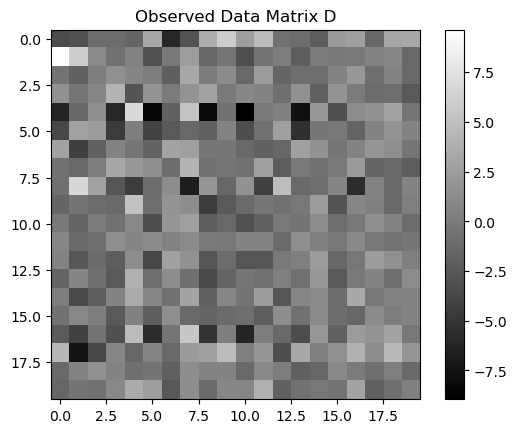

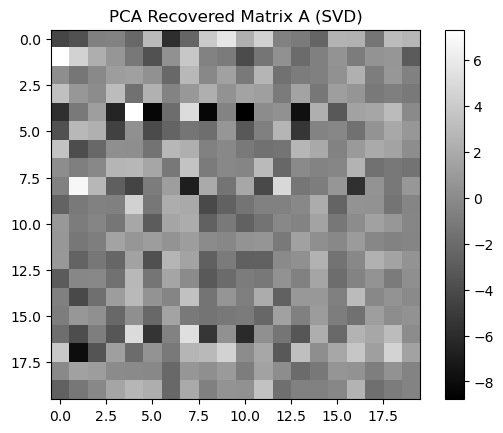

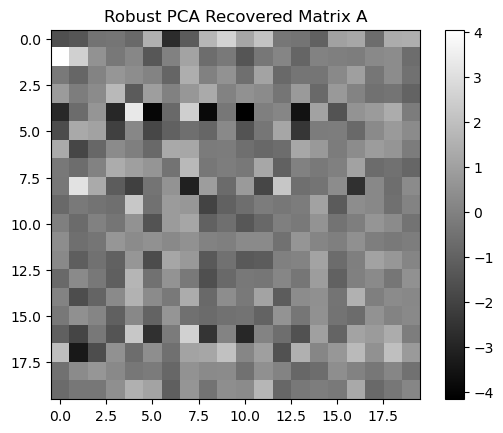

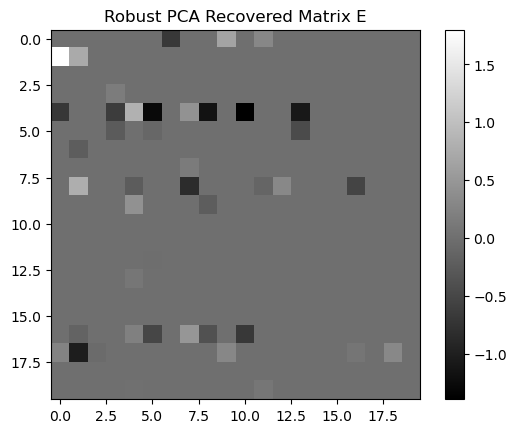

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(m, n, rank, noise_level):
    """ Generate a synthetic data matrix with a known low-rank component and sparse noise. """
    np.random.seed(0)
    A_true = np.random.randn(m, rank) @ np.random.randn(rank, n)
    E_true = np.zeros((m, n))
    E_true[:2, :2] = noise_level * np.random.randn(2, 2)
    D = A_true + E_true
    return A_true, E_true, D

def pca(D, rank):
    """ Perform PCA using Singular Value Decomposition (SVD). """
    U, S, Vt = np.linalg.svd(D, full_matrices=False)
    A = U[:, :rank] @ np.diag(S[:rank]) @ Vt[:rank, :]
    return A

def soft_thresholding(x, threshold):
    """ Apply the soft thresholding operator element-wise. """
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

def robust_pca(D, lambda_param, mu0, epsilon, max_iter=1000, eta=1.2, delta=1.0):
    """ Robust PCA using Accelerated Proximal Gradient. """
    m, n = D.shape
    rank = min(m, n)  # Assume rank as the minimum of dimensions for simplicity
    A = np.zeros((m, n))
    E = np.zeros((m, n))
    Y_A = np.zeros((m, n))
    Y_E = np.zeros((m, n))
    t = 1
    mu = mu0
    
    for k in range(max_iter):
        # Update A
        WA = Y_A - 0.5 * (A + E - D)
        U, S, Vt = np.linalg.svd(WA, full_matrices=False)
        S = soft_thresholding(S, 1 / mu)
        A = U[:, :rank] @ np.diag(S) @ Vt
        
        # Update E
        WE = Y_E - 0.5 * (A + E - D)
        E = soft_thresholding(WE, lambda_param / mu)
        
        # Update multipliers
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        Y_A = A + ((t - 1) / t_new) * (A - A)
        Y_E = E + ((t - 1) / t_new) * (E - E)
        t = t_new
        
        # Update mu
        mu = max(eta * mu, delta * mu0)
        
        # Check convergence
        S_A = 2 * (Y_A - A) + (A + E - Y_A - Y_E)
        S_E = 2 * (Y_E - E) + (A + E - Y_A - Y_E)
        norm_S = np.linalg.norm(S_A, 'fro')**2 + np.linalg.norm(S_E, 'fro')**2
        
        if norm_S <= epsilon:
            break
    
    return A, E

def plot_matrix(matrix, title):
    """ Plot matrix using basic matplotlib. """
    plt.imshow(matrix, cmap='gray', interpolation='none')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Main script
m, n, rank, noise_level = 20, 20, 5, 10
lambda_param = 1.0
mu0 = 1.0
epsilon = 1e-7

# Generate synthetic data
A_true, E_true, D = generate_data(m, n, rank, noise_level)

# Perform PCA
A_pca = pca(D, rank)

# Perform Robust PCA
A_rpca, E_rpca = robust_pca(D, lambda_param, mu0, epsilon)

# Plot Results
plot_matrix(A_true, 'True Low-Rank Matrix A')
plot_matrix(E_true, 'True Sparse Matrix E')
plot_matrix(D, 'Observed Data Matrix D')
plot_matrix(A_pca, 'PCA Recovered Matrix A (SVD)')
plot_matrix(A_rpca, 'Robust PCA Recovered Matrix A')
plot_matrix(E_rpca, 'Robust PCA Recovered Matrix E')


In [ ]:
## Steps
### Data Generation: 
The generate_data function creates synthetic data matrices with a known low-rank component and sparse noise.
### PCA Implementation: 
Uses SVD to estimate the low-rank matrix from the data.

### Robust PCA Implementation: 
Uses Accelerated Proximal Gradient to estimate both the low-rank matrix and sparse errors.
### Error Calculation: 
The reconstruction_error function computes the Frobenius norm of the difference between true and estimated matrices.
### Plotting: 

Uses matplotlib to create bar graphs comparing the reconstruction errors of PCA and Robust PCA for both the low-rank and sparse components.

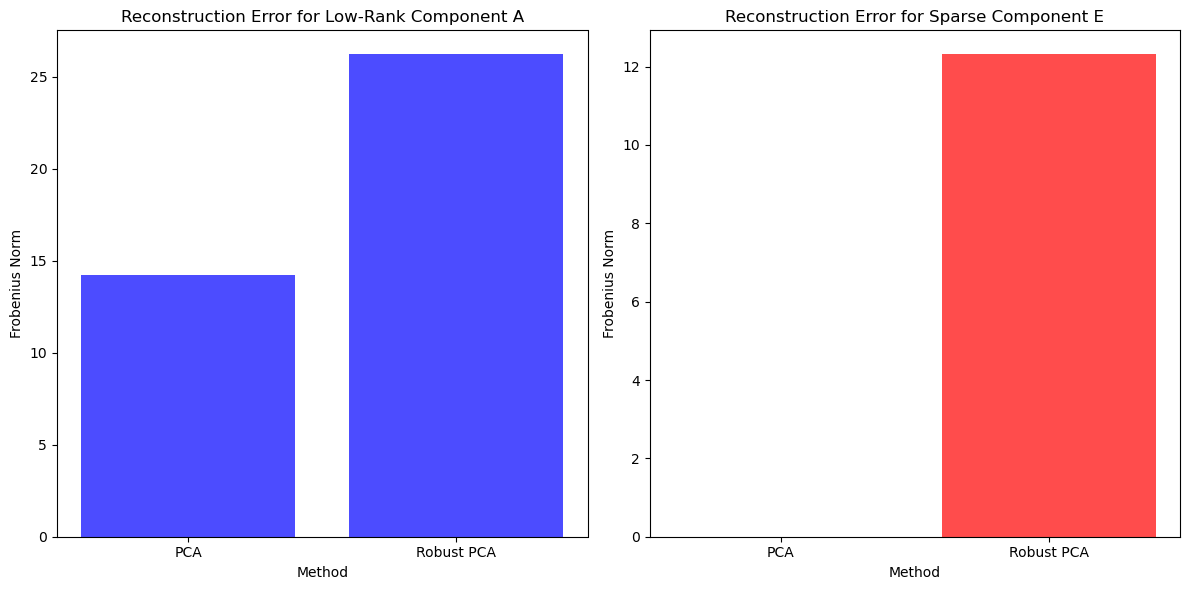

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(m, n, rank, noise_level):
    """ Generate a synthetic data matrix with a known low-rank component and sparse noise. """
    np.random.seed(0)
    A_true = np.random.randn(m, rank) @ np.random.randn(rank, n)
    E_true = np.zeros((m, n))
    E_true[:2, :2] = noise_level * np.random.randn(2, 2)
    D = A_true + E_true
    return A_true, E_true, D

def pca(D, rank):
    """ Perform PCA using Singular Value Decomposition (SVD). """
    U, S, Vt = np.linalg.svd(D, full_matrices=False)
    A = U[:, :rank] @ np.diag(S[:rank]) @ Vt[:rank, :]
    return A

def soft_thresholding(x, threshold):
    """ Apply the soft thresholding operator element-wise. """
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

def robust_pca(D, lambda_param, mu0, epsilon, max_iter=1000, eta=1.2, delta=1.0):
    """ Robust PCA using Accelerated Proximal Gradient. """
    m, n = D.shape
    rank = min(m, n)  # Assume rank as the minimum of dimensions for simplicity
    A = np.zeros((m, n))
    E = np.zeros((m, n))
    Y_A = np.zeros((m, n))
    Y_E = np.zeros((m, n))
    t = 1
    mu = mu0
    
    for k in range(max_iter):
        # Update A
        WA = Y_A - 0.5 * (A + E - D)
        U, S, Vt = np.linalg.svd(WA, full_matrices=False)
        S = soft_thresholding(S, 1 / mu)
        A = U[:, :rank] @ np.diag(S) @ Vt
        
        # Update E
        WE = Y_E - 0.5 * (A + E - D)
        E = soft_thresholding(WE, lambda_param / mu)
        
        # Update multipliers
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        Y_A = A + ((t - 1) / t_new) * (A - A)
        Y_E = E + ((t - 1) / t_new) * (E - E)
        t = t_new
        
        # Update mu
        mu = max(eta * mu, delta * mu0)
        
        # Check convergence
        S_A = 2 * (Y_A - A) + (A + E - Y_A - Y_E)
        S_E = 2 * (Y_E - E) + (A + E - Y_A - Y_E)
        norm_S = np.linalg.norm(S_A, 'fro')**2 + np.linalg.norm(S_E, 'fro')**2
        
        if norm_S <= epsilon:
            break
    
    return A, E

def reconstruction_error(A_true, A_estimated, E_true, E_estimated):
    """ Calculate reconstruction error as the Frobenius norm of the difference. """
    error_A = np.linalg.norm(A_true - A_estimated, 'fro')
    error_E = np.linalg.norm(E_true - E_estimated, 'fro')
    return error_A, error_E

# Main script
m, n, rank, noise_level = 20, 20, 5, 10
lambda_param = 1.0
mu0 = 1.0
epsilon = 1e-7

# Generate synthetic data
A_true, E_true, D = generate_data(m, n, rank, noise_level)

# Perform PCA
A_pca = pca(D, rank)

# Perform Robust PCA
A_rpca, E_rpca = robust_pca(D, lambda_param, mu0, epsilon)

# Calculate errors
error_A_pca, _ = reconstruction_error(A_true, A_pca, E_true, np.zeros_like(E_true))
error_A_rpca, error_E_rpca = reconstruction_error(A_true, A_rpca, E_true, E_rpca)

# Plot results
methods = ['PCA', 'Robust PCA']
errors_A = [error_A_pca, np.linalg.norm(A_true - A_rpca, 'fro')]
errors_E = [0, error_E_rpca]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(methods, errors_A, color='blue', alpha=0.7)
plt.title('Reconstruction Error for Low-Rank Component A')
plt.xlabel('Method')
plt.ylabel('Frobenius Norm')

plt.subplot(1, 2, 2)
plt.bar(methods, errors_E, color='red', alpha=0.7)
plt.title('Reconstruction Error for Sparse Component E')
plt.xlabel('Method')
plt.ylabel('Frobenius Norm')

plt.tight_layout()
plt.show()
